In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year","month"],axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
#check for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

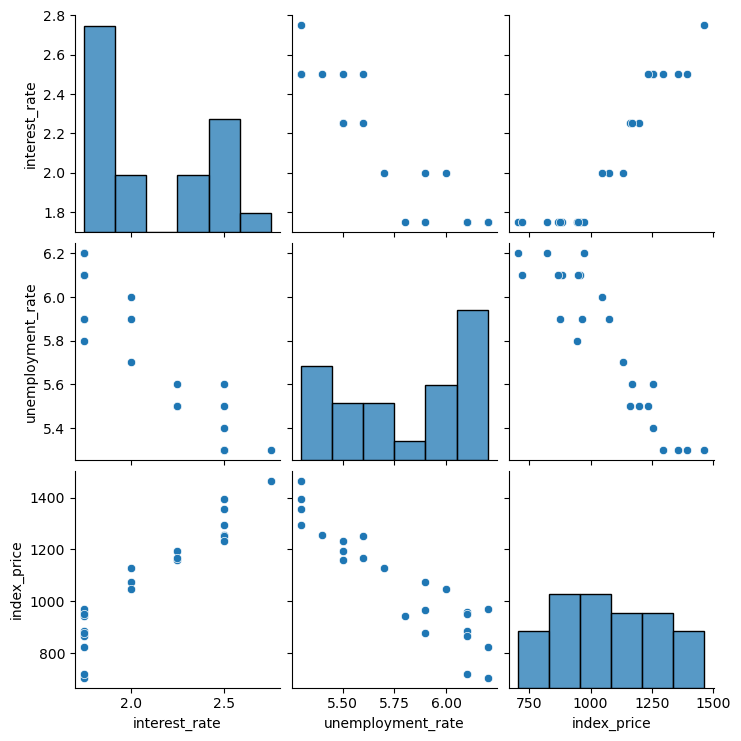

In [6]:
##visualize the data
import seaborn as sns
sns.pairplot(df_index)
plt.show()



In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


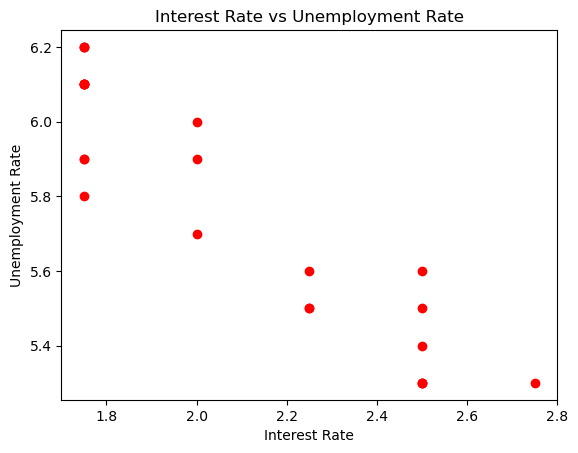

In [8]:
##visualize the data more clearly
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')
plt.show()

In [9]:
##independent and dependent variables
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
X.head()
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [10]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

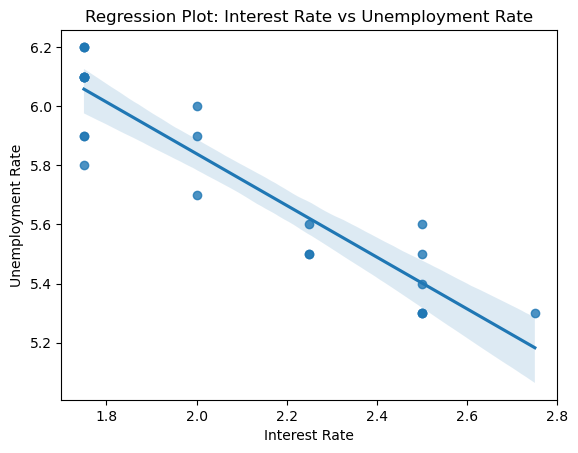

In [11]:
df_index.head()
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Regression Plot: Interest Rate vs Unemployment Rate')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
##cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score
validation_scores = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
np.mean(validation_scores)

-5649.115244350773

In [17]:
## Make predictions on the test set
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [19]:
##performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')   
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
##adjusted r2
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score: {adjusted_r2}')

Mean Squared Error: 5793.762887712558
R^2 Score: 0.8278978091457149
Mean Absolute Error: 59.93578152323547
Root Mean Squared Error: 76.11677139574797
Adjusted R^2 Score: 0.7131630152428581


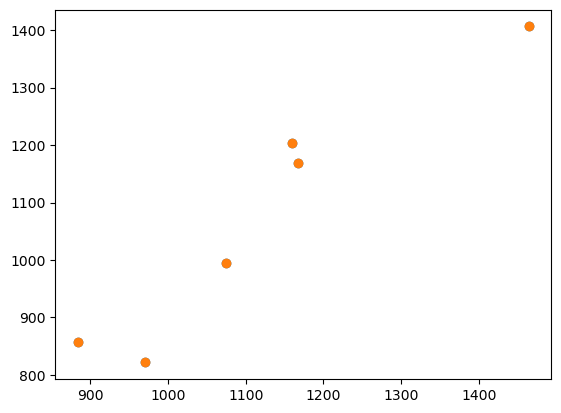

In [21]:
plt.scatter(y_test, y_pred)
plt.show()

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


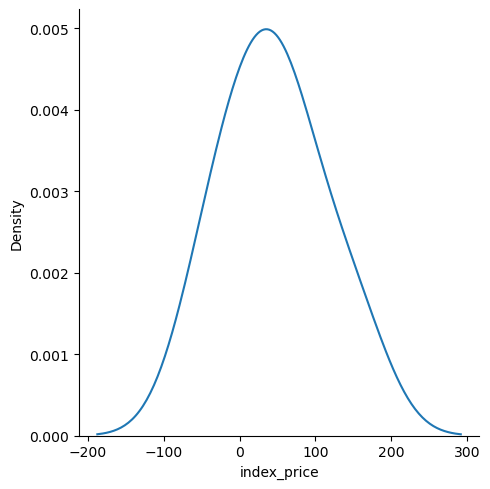

In [27]:
residuals = y_test - y_pred
print(residuals)
plt.show(sns.displot(residuals, kind="kde"))


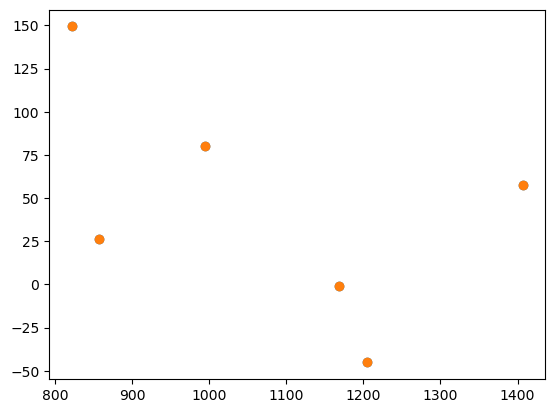

In [29]:
##scatter plot wrt prections and residuals
plt.scatter(y_pred, residuals)
plt.show()

In [30]:
##OLS regression
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(predictions)
print(model.summary())


8     1169.232446
16     869.856341
0     1458.321844
18     871.913683
11    1018.515723
9     1167.175105
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):                    7.46e-19
Time:                        00:57:25   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                

c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [31]:
print(regression.coef_)

[ 260.33709119 -360.58377051]
